In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D,Dropout, BatchNormalization
import random
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chirag1162","key":"3224faf2770726077365386a68844c7e"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset
!kaggle datasets list -s gtsrb-german-traffic-sign
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

/content/traffic_sign_dataset
ref                                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          54248        804  0.8235294        
datasets/valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           7813        221  1.0              
datasets/eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            264      

In [ ]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
for dir, names, files in os.walk("traffic_sign_dataset"):
    print(f"There are {len(names)} directories and {len(files)} images in {dir}")

There are 3 directories and 2 images in traffic_sign_dataset
There are 0 directories and 45 images in traffic_sign_dataset/Meta
There are 43 directories and 0 images in traffic_sign_dataset/Train
There are 0 directories and 1410 images in traffic_sign_dataset/Train/3
There are 0 directories and 780 images in traffic_sign_dataset/Train/31
There are 0 directories and 330 images in traffic_sign_dataset/Train/21
There are 0 directories and 2160 images in traffic_sign_dataset/Train/13
There are 0 directories and 240 images in traffic_sign_dataset/Train/41
There are 0 directories and 1440 images in traffic_sign_dataset/Train/7
There are 0 directories and 300 images in traffic_sign_dataset/Train/39
There are 0 directories and 1200 images in traffic_sign_dataset/Train/35
There are 0 directories and 630 images in traffic_sign_dataset/Train/15
There are 0 directories and 2250 images in traffic_sign_dataset/Train/2
There are 0 directories and 1860 images in traffic_sign_dataset/Train/5
There are 

In [ ]:
train_dir = "traffic_sign_dataset/Train"
test_dir = "traffic_sign_dataset/Test"
label_dir = "traffic_sign_dataset/Meta"

In [ ]:
# Display all 43 unique classes
df_train = pd.read_csv("traffic_sign_dataset/Train.csv")
class_ids = np.array(sorted(df_train['ClassId'].unique()))
class_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

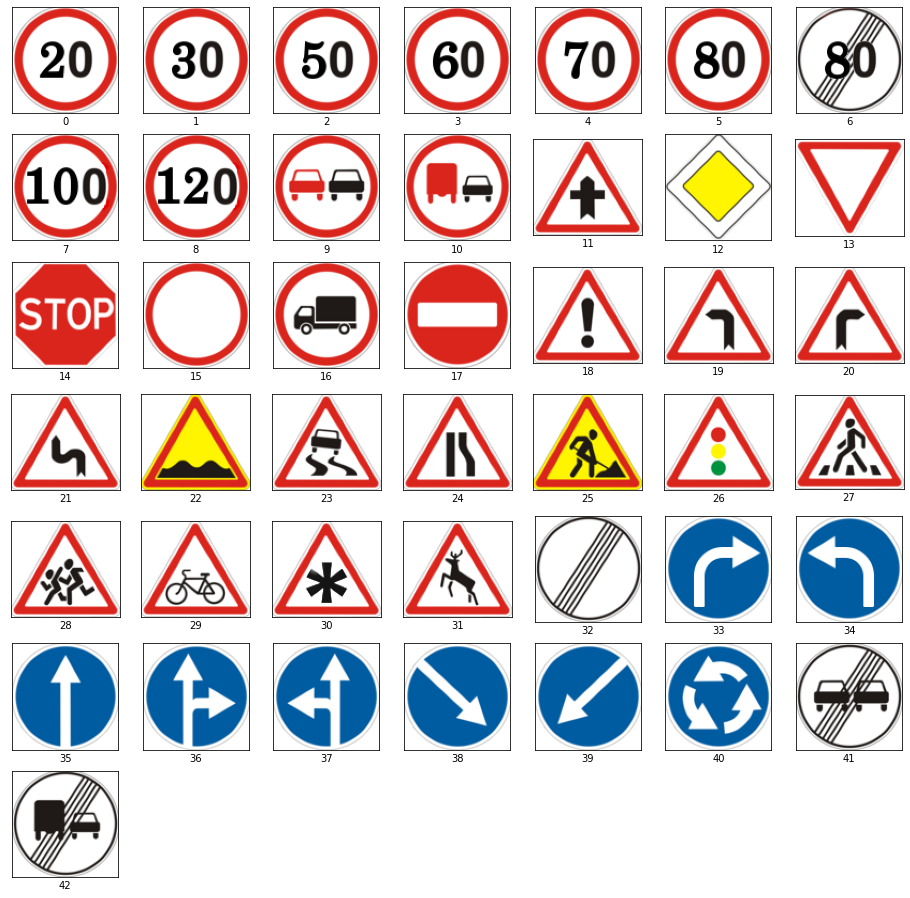

In [ ]:
path = label_dir
plt.figure(figsize=(16,16))
for i in range(0, 43):
    plt.subplot(7,7,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(str(i))
    image = plt.imread(path + "/" + str(i) + ".png")
    plt.imshow(image)

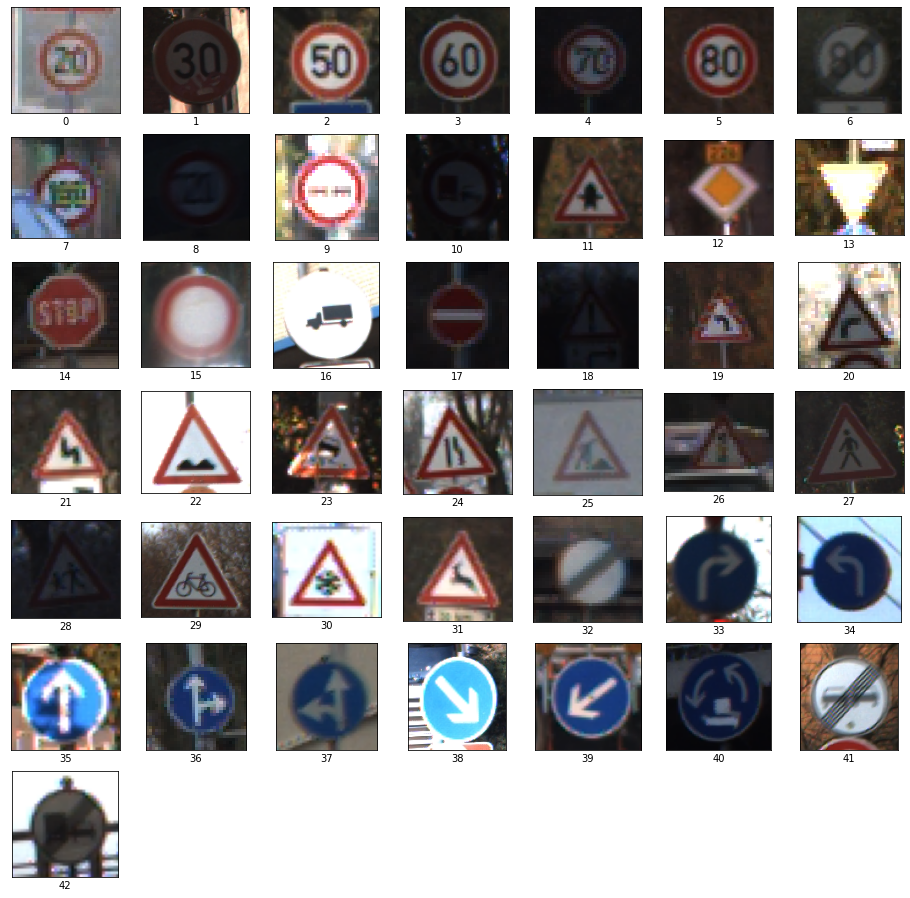

In [ ]:
path = train_dir
plt.figure(figsize=(16,16))
for i in range(0, 43):
    files = os.listdir(path + "/" + str(i))
    random_image = random.choice(files)
    plt.subplot(7,7,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(str(i))
    image = plt.imread(path + "/" + str(i) + "/" + random_image)
    plt.imshow(image)

In [ ]:
def prepare_data(dir_path):
    filenames = []
    labels = []
    for i in range(43):
        train_path = train_dir + '/' + str(i)
        image_path = os.listdir(train_path)
        for x in image_path:
            img = Image.open(train_path + '/' + x)
            img = img.resize((28,28))
            img = np.array(img)
            filenames.append(img)
            labels.append(i)
    return np.array(filenames)/ 255 , np.array(labels)

In [ ]:
def preProcessing(X, y):
    # Downloading the dataset
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

    # one hot encoding or format accepted by tensorflow - vector structure.
    y_train = to_categorical(y_train, len(class_ids))
    y_val = to_categorical(y_val, len(class_ids))

    # Printing the X_train and y_train
    print("X_train shape", X_train.shape)
    print("y_train shape", y_train.shape)

    return X_train, y_train, X_val, y_val

In [ ]:
def cnn_model():
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding="same" , input_shape=(28, 28, 3)),
    Conv2D(32, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding="same"),
    Conv2D(128, (3, 3), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(43, activation="softmax") # Number of classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [ ]:
def model_summary(result):
    # Displaying Loss and Accuracy
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(result.history['loss'], label='loss')
    plt.plot(result.history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(result.history['accuracy'], label='accuracy')
    plt.plot(result.history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.legend()

In [ ]:
def run_model():
    
    X, y = prepare_data(train_dir)

    # Loading and pre processing data
    X_train, y_train, X_val, y_val = preProcessing(X, y)

    # Loading model
    model = cnn_model()

    # Early Stopping with patience 10
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # model fit
    result = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_val, y_val), callbacks=[callback], verbose=2)
    
    # Displaying accuracy and loss
    model_summary(result)

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_val,  y_val, verbose=2)
    print("Total Accuracy", test_acc)
    
    # Save model
    model.save('normal_cnn_traffic_sign_recognition.h5')

X_train shape (31367, 28, 28, 3)
y_train shape (31367, 43)
Epoch 1/100
981/981 - 25s - loss: 1.3561 - accuracy: 0.6073 - val_loss: 0.1049 - val_accuracy: 0.9695 - 25s/epoch - 26ms/step
Epoch 2/100
981/981 - 15s - loss: 0.0833 - accuracy: 0.9743 - val_loss: 0.0704 - val_accuracy: 0.9788 - 15s/epoch - 15ms/step
Epoch 3/100
981/981 - 13s - loss: 0.0477 - accuracy: 0.9859 - val_loss: 0.0522 - val_accuracy: 0.9838 - 13s/epoch - 13ms/step
Epoch 4/100
981/981 - 14s - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.1409 - val_accuracy: 0.9663 - 14s/epoch - 15ms/step
Epoch 5/100
981/981 - 13s - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0409 - val_accuracy: 0.9895 - 13s/epoch - 13ms/step
Epoch 6/100
981/981 - 13s - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0853 - val_accuracy: 0.9769 - 13s/epoch - 13ms/step
Epoch 7/100
981/981 - 13s - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.0394 - val_accuracy: 0.9883 - 13s/epoch - 13ms/step
Epoch 8/100
981/981 - 14s - loss: 0.0282 - accuracy: 0.9920

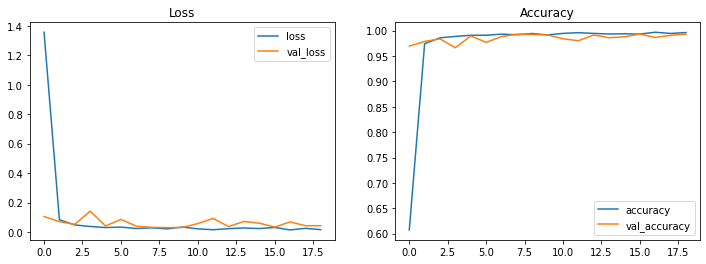

In [ ]:
run_model()